# **Analyzing Screen Time:**

Screen time analysis refers to analyzing the amount of time a user spends interacting with their device (such as a smartphone, tablet, or computer) and various applications on a daily, weekly, or monthly basis.

The dataset contains `daily screen time data` for various apps used by users. Each record includes the following columns:

- `Date`: The date on which the data was recorded.

- `App`: The name of the application being used (e.g., Instagram, WhatsApp).

- `Usage (minutes)`: The total number of minutes spent on the app each day.

- `Notifications`: The number of notifications received from the app each day.

- `Times Opened`: The number of times the app was opened on the recorded day.

The dataSet can found at the following link: 
> __https://statso.io/screen-time-case-study/__

## **Problem:**

The objective is to analyze the screen time patterns of users to identify how notifications and user engagement behaviors influence overall app usage. 

Specifically, the task is to quantify how turning off notifications for certain apps impacts the overall screen time for helping users reduce unnecessary app usage. 

By evaluating daily screen time trends, the frequency of app interactions, and the impact of notifications, the goal is to provide actionable insights on how notification settings can influence screen time reduction and healthier device habits.

---------------------

#### Step-1: **Getting the Data:**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib.gridspec import GridSpec 
import seaborn as sns 

In [2]:
data= pd.read_csv("/home/russ/Desktop/_PROJECTS_/00_DataSets/01_screentime_analysis.csv")

-----------------------

#### **Step-2: Data Exploration:**

1. First few rows of the dataset:

In [3]:
data.head()

,Date,App,Usage (minutes),Notifications,Times Opened
0,2024-08-07,Instagram,81,24,57
1,2024-08-08,Instagram,90,30,53
2,2024-08-26,Instagram,112,33,17
3,2024-08-22,Instagram,82,11,38
4,2024-08-12,Instagram,59,47,16


2. Check the dataset dimensions: 

In [4]:
data.shape

(200, 5)

3. Inspect column data types and check for missing values:

In [5]:
(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             200 non-null    object
 1   App              200 non-null    object
 2   Usage (minutes)  200 non-null    int64 
 3   Notifications    200 non-null    int64 
 4   Times Opened     200 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 7.9+ KB


In [6]:
data.isnull().sum()

Date               0
App                0
Usage (minutes)    0
Notifications      0
Times Opened       0
dtype: int64

4. Get basic statistics for numerical columns:

In [7]:
data.describe() 

,Usage (minutes),Notifications,Times Opened
count,200.000000,200.000000,200.00000
mean,37.750000,28.735000,21.63000
std,29.711299,35.801726,24.27301
min,1.000000,0.000000,1.00000
25%,17.000000,1.750000,4.00000
50%,26.000000,11.500000,10.00000
75%,51.250000,47.000000,32.00000
max,119.000000,147.000000,99.00000


5. Check data types of all columns to identify any issues:

In [8]:
data.dtypes

Date               object
App                object
Usage (minutes)     int64
Notifications       int64
Times Opened        int64
dtype: object

6. `Unique Values`: Count unique values in each column:

In [9]:
data.nunique()

Date               30
App                 8
Usage (minutes)    81
Notifications      76
Times Opened       62
dtype: int64

7. Calculate percentage of missing values for each column:

In [10]:
# Calculate percentage of missing values for each column:
missing_values_percentage = data.isnull().mean() * 100
missing_values_percentage

Date               0.0
App                0.0
Usage (minutes)    0.0
Notifications      0.0
Times Opened       0.0
dtype: float64

8. `Duplicate Records`: Identify duplicate rows:

In [11]:
data.duplicated().sum()

np.int64(0)

So, no duplicated rows detected. 

9. `Outliers`:

- Use `box plots` or `z-scores` to detect outliers in numerical data.

- For example: `from scipy.stats import zscore` to calculate `z-scores`.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

/tmp/ipykernel_1989/2045472653.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 800x1200 with 0 Axes>

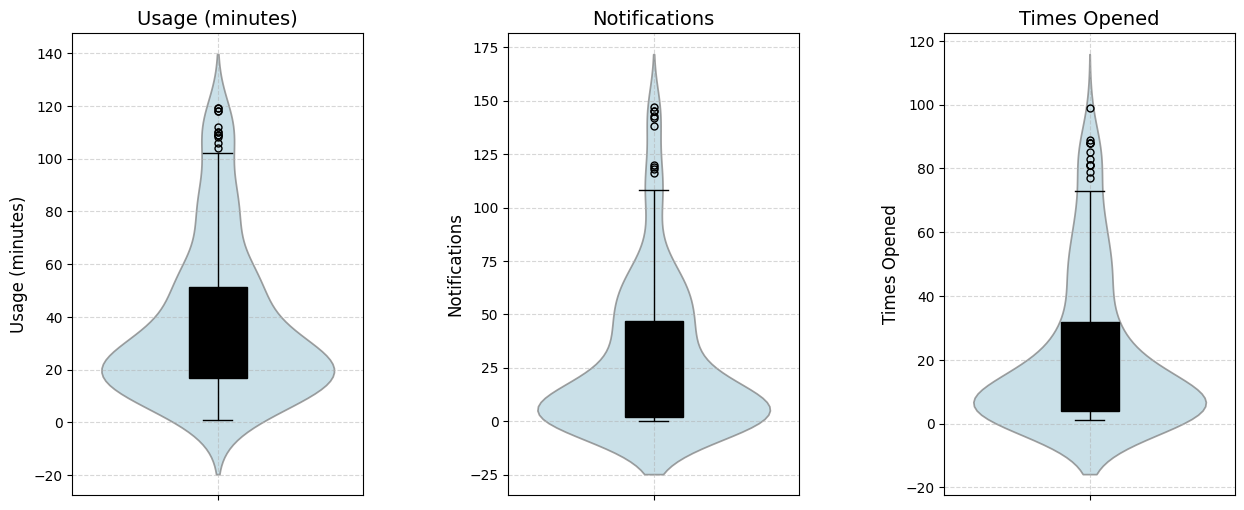

In [13]:
df= data 

# Identify numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Create a figure and define a grid using GridSpec
fig = plt.figure(figsize=(8, 12))  # Adjust figure size for vertical alignment
gs = GridSpec(len(numerical_columns), 1, hspace=0.5)  # Vertical grid

# Create a figure and define a grid using GridSpec for column-wise arrangement
fig = plt.figure(figsize=(15, 6))  # Adjust figure size for column-wise alignment
gs = GridSpec(1, len(numerical_columns), wspace=0.5)  # Horizontal grid

# Plot box plot and violin plot for each numerical column
for idx, column in enumerate(numerical_columns):
    ax = fig.add_subplot(gs[idx])  # Create a subplot for each column
    sns.violinplot(data=df, y=column, ax=ax, inner=None, color='lightblue', alpha=0.7)
    sns.boxplot(data=df, y=column, ax=ax, color='black', width=0.2, fliersize=5)
    
    # Add titles and labels
    ax.set_title(f'{column}', fontsize=14)
    ax.set_ylabel(column, fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.5)

# Show the plots
plt.tight_layout()
plt.show()

10. `Inconsistent Data`: Check for typos or inconsistencies in categorical variables:

In [14]:
data['App'].value_counts()

App
Instagram      25
X              25
WhatsApp       25
8 Ball Pool    25
Safari         25
Netflix        25
Facebook       25
LinkedIn       25
Name: count, dtype: int64

No typos and inconsistencies were detected. 

11. `Invalid Dates`: Ensure all dates in the Date column are valid and in the correct range:

In [15]:
data.dtypes

Date               object
App                object
Usage (minutes)     int64
Notifications       int64
Times Opened        int64
dtype: object

`Date` and `App` are `Python Object` data types. Others, `Usage`, `Times` and `Notifications` columns are `int64`. 

12. `Column Names`: All the columns of the dataset:

In [16]:
# All the columns of the dataset: v
data.columns

Index(['Date', 'App', 'Usage (minutes)', 'Notifications', 'Times Opened'], dtype='object')

13. **Column DataTypes:**

In [96]:
data.dtypes

App                object
Usage (minutes)     int64
Notifications       int64
Times Opened        int64
Day                object
Is Weekend           bool
Cluster             int32
dtype: object

----------------------

#### **Step-3: Data Cleaning:**

1. `Missing Values`: Decide whether to fill or drop them:

In [17]:
data.fillna(0, inplace=True)  # Example: Fill missing values with 0

2. `Data Types`: Ensure columns like Date are in the correct format:

In [18]:
data['Date'] = pd.to_datetime(data['Date'])

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             200 non-null    datetime64[ns]
 1   App              200 non-null    object        
 2   Usage (minutes)  200 non-null    int64         
 3   Notifications    200 non-null    int64         
 4   Times Opened     200 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 7.9+ KB


3. `Duplicates`: Remove duplicate entries if any:

In [20]:
data.drop_duplicates(inplace=True)

In [21]:
data.shape

(200, 5)

There were no duplicates hence, none of the entries were deleted from the dataset. 

4. Convert `categorical` columns like `App` to `string type`:

In [22]:
# Convert categorical columns like App Name to string type:
df['App'] = df['App'].astype(str)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             200 non-null    datetime64[ns]
 1   App              200 non-null    object        
 2   Usage (minutes)  200 non-null    int64         
 3   Notifications    200 non-null    int64         
 4   Times Opened     200 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 7.9+ KB


----------------------

#### **Step-4: Feature Engineering:**

Add new columns for deeper insights. 

1. `Day of the Week`: To analyze patterns by weekdays:

In [24]:
data['Day'] = data['Date'].dt.day_name()

2. `Total Daily Usage`: Group by Date and calculate the sum of App Usage Time:

In [25]:
daily_usage = data.groupby('Date')['Usage (minutes)'].sum().reset_index()
daily_usage.rename(columns={'Usage (minutes)': 'Total Daily Usage'}, inplace=True)
daily_usage.head()

,Date,Total Daily Usage
0,2024-08-01,300
1,2024-08-02,30
2,2024-08-03,338
3,2024-08-04,165
4,2024-08-05,244


3. `Average Notifications per Day:` Aggregate data for insights:

In [26]:
avg_notifications = data.groupby('Date')['Notifications'].mean().reset_index()
avg_notifications.rename(columns={'Notifications': 'Avg Notifications'}, inplace=True) 
avg_notifications.head()

,Date,Avg Notifications
0,2024-08-01,10.000000
1,2024-08-02,2.000000
2,2024-08-03,16.363636
3,2024-08-04,16.200000
4,2024-08-05,31.166667


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             200 non-null    datetime64[ns]
 1   App              200 non-null    object        
 2   Usage (minutes)  200 non-null    int64         
 3   Notifications    200 non-null    int64         
 4   Times Opened     200 non-null    int64         
 5   Day              200 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 9.5+ KB


4. Is Weekend:

In [28]:
df['Is Weekend'] = df['Date'].dt.weekday >= 5

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             200 non-null    datetime64[ns]
 1   App              200 non-null    object        
 2   Usage (minutes)  200 non-null    int64         
 3   Notifications    200 non-null    int64         
 4   Times Opened     200 non-null    int64         
 5   Day              200 non-null    object        
 6   Is Weekend       200 non-null    bool          
dtypes: bool(1), datetime64[ns](1), int64(3), object(2)
memory usage: 9.7+ KB


5. `Aggregate Data`: Group by App Name to calculate total/average usage, notifications, and openings:

In [30]:
app_summary = df.groupby('App').agg({
    'Usage (minutes)': 'sum',
    'Notifications': 'sum',
    'Times Opened': 'sum'
}).reset_index() 
app_summary

,App,Usage (minutes),Notifications,Times Opened
0,8 Ball Pool,452,113,182
1,Facebook,842,993,755
2,Instagram,1898,1245,1039
3,LinkedIn,390,223,119
4,Netflix,1819,11,64
5,Safari,270,18,132
6,WhatsApp,1204,2498,1706
7,X,675,646,329


------------------

## **Exploratory Data Analysis (EDA):**

#### **Step-5: Univariate Analysis:**

1. Distribution of App Usage Time:

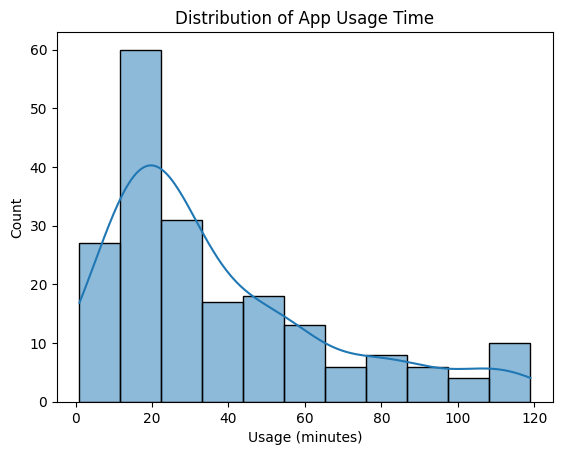

In [31]:
sns.histplot(df['Usage (minutes)'], kde=True)
plt.title('Distribution of App Usage Time')
plt.show()

2. Most Frequently Used Apps:

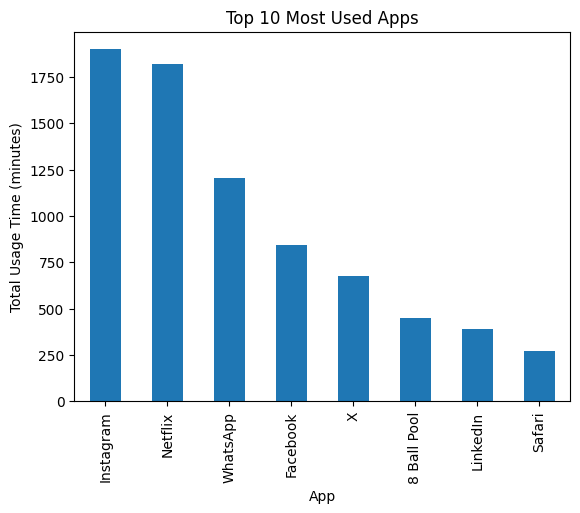

In [32]:
top_apps = df.groupby('App')['Usage (minutes)'].sum().sort_values(ascending=False).head(10)
top_apps.plot(kind='bar')
plt.title('Top 10 Most Used Apps')
plt.ylabel('Total Usage Time (minutes)')
plt.show()

3. `Date Column`: Analyze the temporal distribution of data points: 
- Count of records by date (time series plot).

- Distribution of data points across weekdays, months, or years.

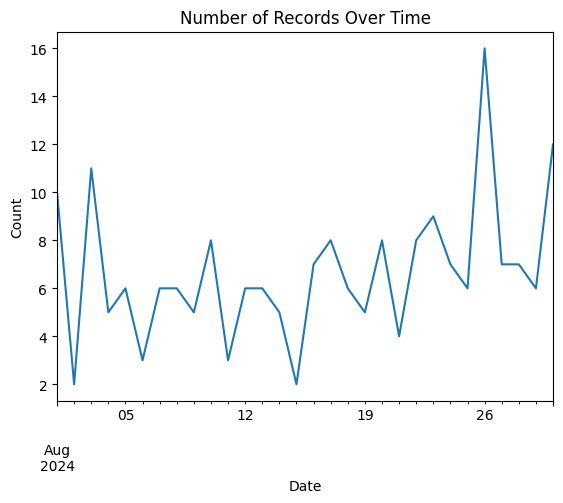

In [33]:
daily_counts = df['Date'].value_counts().sort_index()
daily_counts.plot(kind='line')
plt.title('Number of Records Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

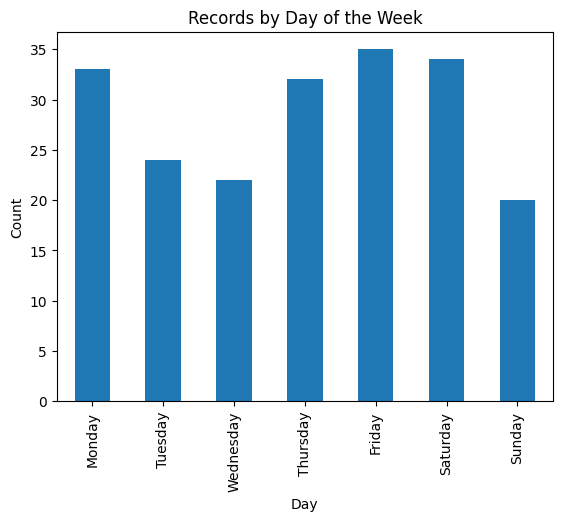

In [34]:
df['Day'] = df['Date'].dt.day_name()
day_counts = df['Day'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
day_counts.plot(kind='bar')
plt.title('Records by Day of the Week')
plt.ylabel('Count')
plt.show()

4. `App Name`: Identify the most frequently used apps and their contribution to usage:
- Count of records per app.

- Total usage time per app.

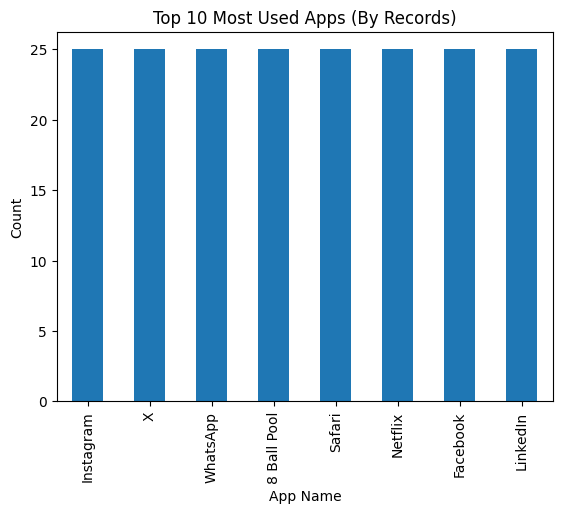

In [35]:
# Bar Plot for App Usage Count:  
app_counts = df['App'].value_counts().head(10)
app_counts.plot(kind='bar')
plt.title('Top 10 Most Used Apps (By Records)')
plt.xlabel('App Name')
plt.ylabel('Count')
plt.show()

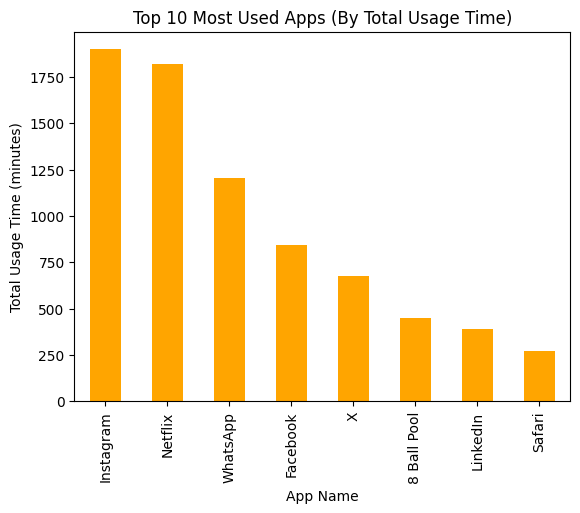

In [36]:
# Bar Plot for Total Usage Time:
app_usage = df.groupby('App')['Usage (minutes)'].sum().sort_values(ascending=False).head(10)
app_usage.plot(kind='bar', color='orange')
plt.title('Top 10 Most Used Apps (By Total Usage Time)')
plt.xlabel('App Name')
plt.ylabel('Total Usage Time (minutes)')
plt.show()


5.  `App Usage Time (in minutes)`: Understand the distribution and identify outliers.
- Distribution of usage time.

- Statistics: mean, median, mode, minimum, maximum.

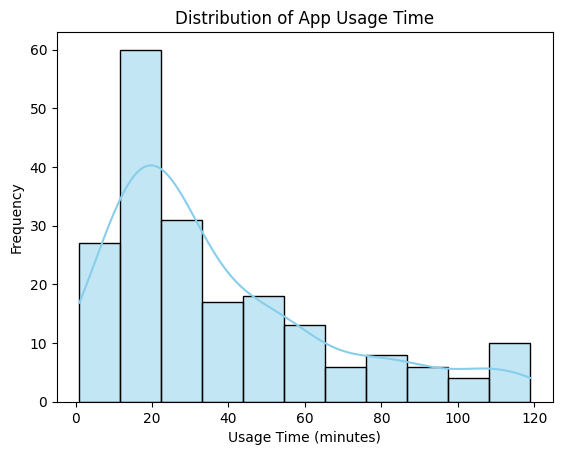

In [37]:
sns.histplot(df['Usage (minutes)'], kde=True, color='skyblue')
plt.title('Distribution of App Usage Time')
plt.xlabel('Usage Time (minutes)')
plt.ylabel('Frequency')
plt.show()

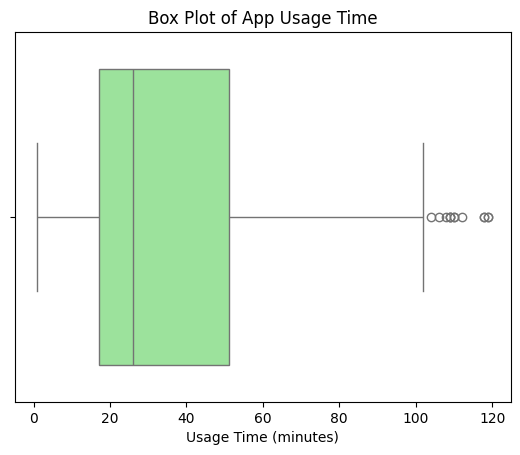

In [38]:
sns.boxplot(x=df['Usage (minutes)'], color='lightgreen')
plt.title('Box Plot of App Usage Time')
plt.xlabel('Usage Time (minutes)')
plt.show()

5. `Notifications Received`: Examine the distribution and its contribution to usage behavior.

- Distribution of notifications received.

- Identify apps or days with unusually high notifications.

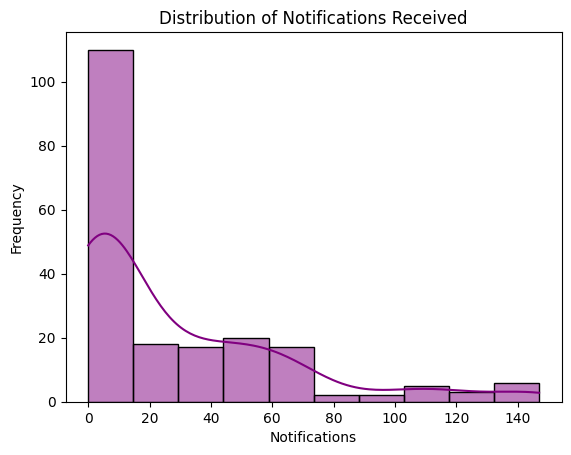

In [39]:
sns.histplot(df['Notifications'], kde=True, color='purple')
plt.title('Distribution of Notifications Received')
plt.xlabel('Notifications')
plt.ylabel('Frequency')
plt.show()

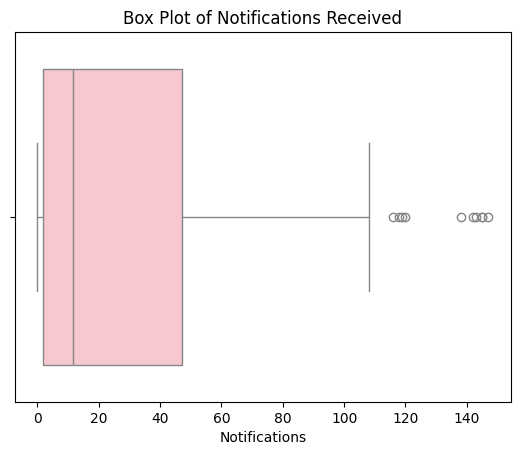

In [40]:
sns.boxplot(x=df['Notifications'], color='pink')
plt.title('Box Plot of Notifications Received')
plt.xlabel('Notifications')
plt.show()

6. `Total Number of Times the App Was Opened`: Analyze how often apps are opened on average:

- Distribution of app openings.

- Identify apps with high opening counts.

In [41]:
data.columns

Index(['Date', 'App', 'Usage (minutes)', 'Notifications', 'Times Opened',
       'Day', 'Is Weekend'],
      dtype='object')

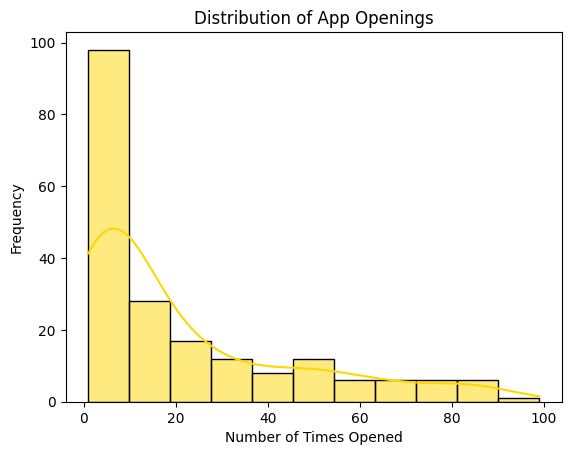

In [42]:
sns.histplot(df['Times Opened'], kde=True, color='gold')
plt.title('Distribution of App Openings')
plt.xlabel('Number of Times Opened')
plt.ylabel('Frequency')
plt.show()

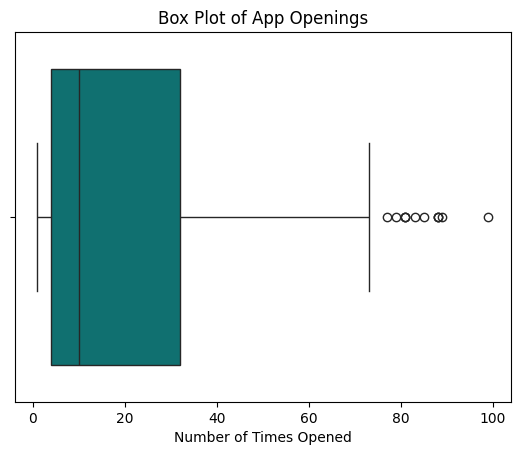

In [43]:
sns.boxplot(x=df['Times Opened'], color='teal')
plt.title('Box Plot of App Openings')
plt.xlabel('Number of Times Opened')
plt.show()


7.  `Summary Statistics:`
For each numerical column, calculate key statistics such as:

 - Mean, Median, and Mode.
 - Variance and Standard Deviation.
 - Min, Max, and Range.

In [44]:
df.columns

Index(['Date', 'App', 'Usage (minutes)', 'Notifications', 'Times Opened',
       'Day', 'Is Weekend'],
      dtype='object')

In [45]:
stats = df[['Usage (minutes)', 'Notifications', 'Times Opened']].describe()
print(stats)

       Usage (minutes)  Notifications  Times Opened
count       200.000000     200.000000     200.00000
mean         37.750000      28.735000      21.63000
std          29.711299      35.801726      24.27301
min           1.000000       0.000000       1.00000
25%          17.000000       1.750000       4.00000
50%          26.000000      11.500000      10.00000
75%          51.250000      47.000000      32.00000
max         119.000000     147.000000      99.00000


8. `Density Plot`: For smoother visualization of distributions: 

/tmp/ipykernel_1989/3142142722.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Usage (minutes)'], shade=True, color='blue')


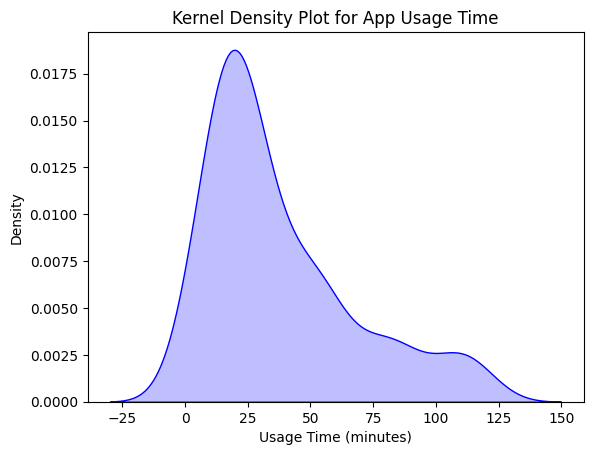

In [46]:
sns.kdeplot(df['Usage (minutes)'], shade=True, color='blue')
plt.title('Kernel Density Plot for App Usage Time')
plt.xlabel('Usage Time (minutes)')
plt.show()

9. `Count Plot ` (for Categorical Data):

/tmp/ipykernel_1989/2307311449.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='App', order=df['App'].value_counts().head(10).index, palette='viridis')


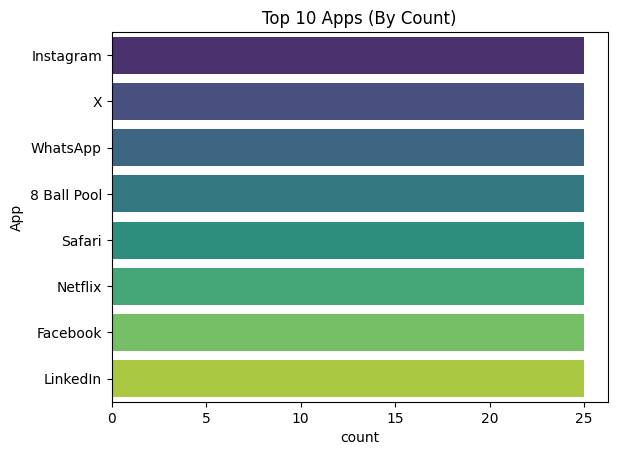

In [47]:
sns.countplot(data=df, y='App', order=df['App'].value_counts().head(10).index, palette='viridis')
plt.title('Top 10 Apps (By Count)')
plt.show()


10. `Pie Chart` (for Proportions):

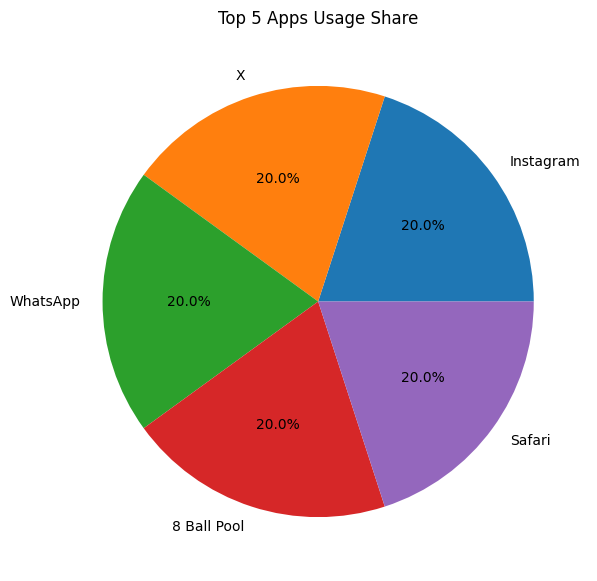

In [48]:
app_share = df['App'].value_counts().head(5)
app_share.plot(kind='pie', autopct='%1.1f%%', figsize=(7, 7))
plt.title('Top 5 Apps Usage Share')
plt.ylabel('')
plt.show()

--------------

#### **Step-6: BiVariate Analysis**

`Bivariate analysis` involves examining relationships between two variables. The goal is to explore `correlations`, `trends`, and `patterns` that may exist between different columns in our dataset.

1.  `App Usage Time vs. Notifications Received`: Determine if there's a relationship between app usage time and the number of notifications.  

- Scatter plot to visualize the relationship.

- Correlation coefficient to quantify the strength of the relationship.

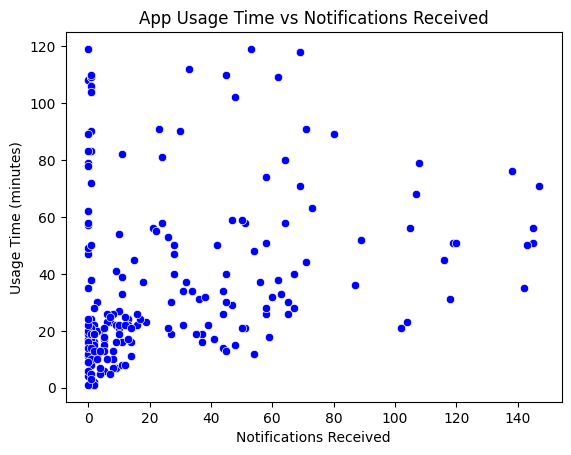

In [49]:
# Scatter Plot
sns.scatterplot(data=df, x='Notifications', y='Usage (minutes)', color='blue')
plt.title('App Usage Time vs Notifications Received')
plt.xlabel('Notifications Received')
plt.ylabel('Usage Time (minutes)')
plt.show()

In [50]:
# Correlation Coefficient
correlation = df['Notifications'].corr(df['Usage (minutes)'])
print(f"Correlation between Notifications and App Usage Time: {correlation:.2f}")

Correlation between Notifications and App Usage Time: 0.28


2. `App Usage Time vs. Total Number of Times Opened`: Investigate if apps that are opened more frequently are used for longer durations.

- Scatter plot to observe the trend.

- Use regression line for better visualization.

In [51]:
data.columns

Index(['Date', 'App', 'Usage (minutes)', 'Notifications', 'Times Opened',
       'Day', 'Is Weekend'],
      dtype='object')

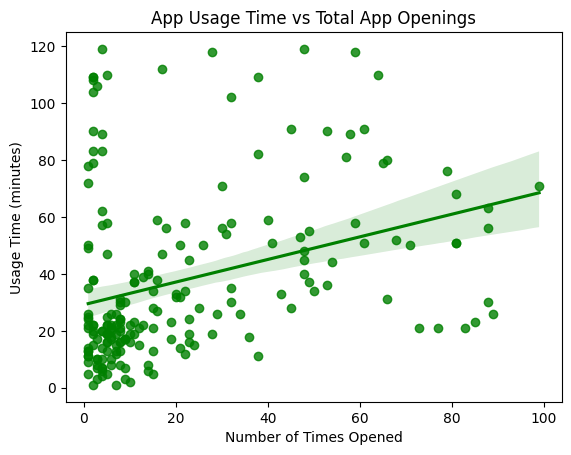

In [52]:
# Scatter Plot with Regression Line
sns.regplot(data=df, x='Times Opened', y='Usage (minutes)', color='green')
plt.title('App Usage Time vs Total App Openings')
plt.xlabel('Number of Times Opened')
plt.ylabel('Usage Time (minutes)')
plt.show()

3.  `App Usage Time vs. Day of the Week`: Analyze how usage time varies by day of the week.

- Group data by day and calculate mean usage time.

- Use a bar plot to show differences.

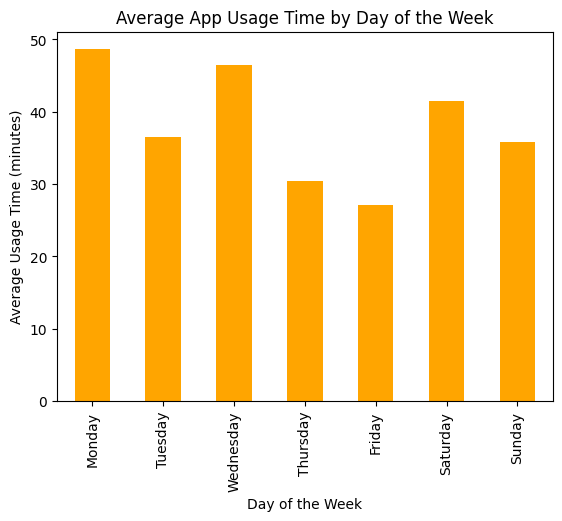

In [53]:
# Mean Usage Time by Day of the Week
usage_by_day = df.groupby('Day')['Usage (minutes)'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Bar Plot
usage_by_day.plot(kind='bar', color='orange')
plt.title('Average App Usage Time by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Usage Time (minutes)')
plt.show()

4. `App Usage Time vs. App Name:` Understand which apps have the highest average usage time.

- Group data by app name and calculate mean usage time.

- Use a horizontal bar plot for visualization.

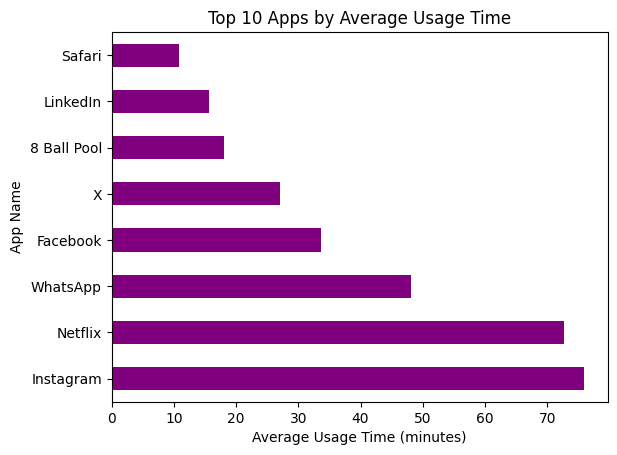

In [54]:
# Average Usage Time by App Name
avg_usage_by_app = df.groupby('App')['Usage (minutes)'].mean().sort_values(ascending=False).head(10)

# Horizontal Bar Plot
avg_usage_by_app.plot(kind='barh', color='purple')
plt.title('Top 10 Apps by Average Usage Time')
plt.xlabel('Average Usage Time (minutes)')
plt.ylabel('App Name')
plt.show()


5. `Notifications Received vs. Total Number of Times Opened:` Explore if apps with more notifications are opened more often.

- Scatter plot to visualize the relationship.

- Correlation coefficient to quantify it.

In [55]:
data.columns

Index(['Date', 'App', 'Usage (minutes)', 'Notifications', 'Times Opened',
       'Day', 'Is Weekend'],
      dtype='object')

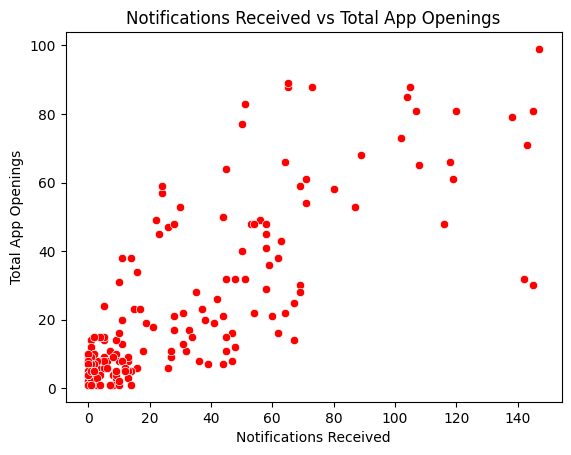

In [56]:
# Scatter Plot
sns.scatterplot(data=df, x='Notifications', y='Times Opened', color='red')
plt.title('Notifications Received vs Total App Openings')
plt.xlabel('Notifications Received')
plt.ylabel('Total App Openings')
plt.show()

In [57]:
# Correlation Coefficient
correlation = df['Notifications'].corr(df['Times Opened'])
print(f"Correlation between Notifications and Total App Openings: {correlation:.2f}")

Correlation between Notifications and Total App Openings: 0.80


6. `Notifications Received vs. Day of the Week`: Analyze how notifications vary by the day of the week.

- Group data by day and calculate the mean number of notifications.

- Use a bar plot for visualization.

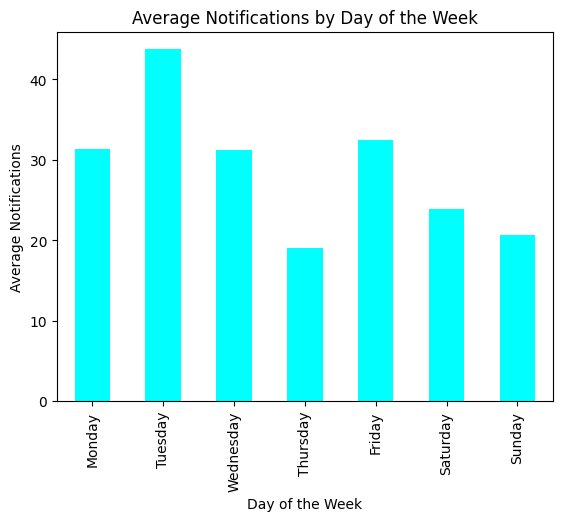

In [58]:
# Mean Notifications by Day of the Week
notifications_by_day = df.groupby('Day')['Notifications'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Bar Plot
notifications_by_day.plot(kind='bar', color='cyan')
plt.title('Average Notifications by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Notifications')
plt.show()


7.  `Total Number of Times Opened vs. Day of the Week`: Determine if there are differences in the frequency of app openings by day.

- Group data by day and calculate the mean number of times apps were opened.

- Visualize using a bar plot.

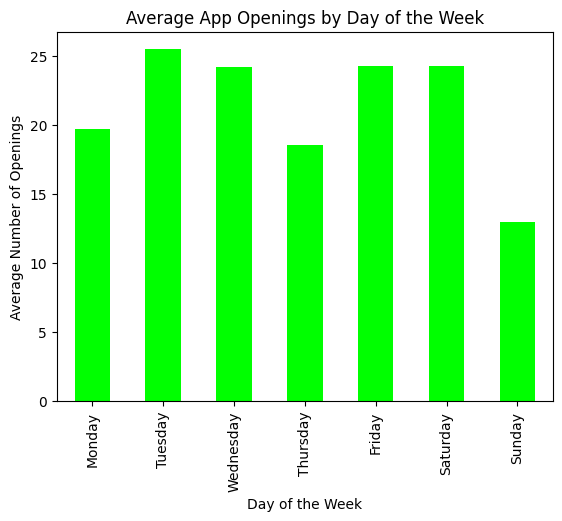

In [59]:
# Mean App Openings by Day of the Week
openings_by_day = df.groupby('Day')['Times Opened'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Bar Plot
openings_by_day.plot(kind='bar', color='lime')
plt.title('Average App Openings by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Number of Openings')
plt.show()


8. `Heatmap of Correlations`: Identify overall relationships between numerical variables.

- Compute a correlation matrix.

- Visualize it using a heatmap.

In [60]:
df.columns

Index(['Date', 'App', 'Usage (minutes)', 'Notifications', 'Times Opened',
       'Day', 'Is Weekend'],
      dtype='object')

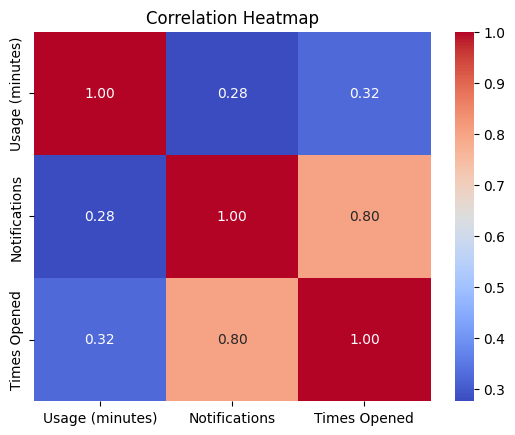

In [61]:
# Correlation Matrix
correlation_matrix = df[['Usage (minutes)', 'Notifications', 'Times Opened']].corr()

# Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

9. `Pair Plot`: Analyze pairwise relationships among numerical columns:

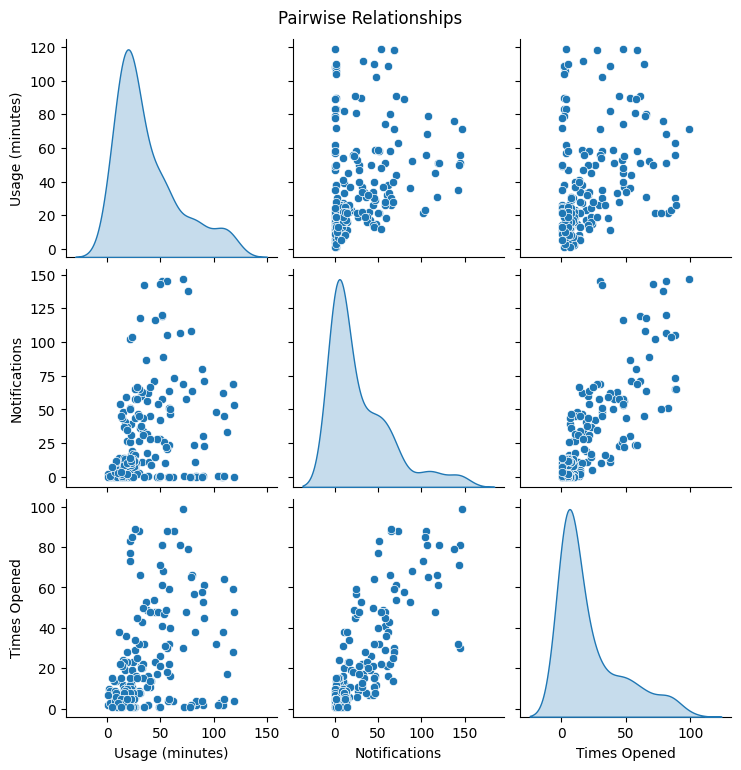

In [62]:
sns.pairplot(df[['Usage (minutes)', 'Notifications', 'Times Opened']], diag_kind='kde')
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()

#### **Findings:**

1. Are notifications strongly correlated with app usage time?

2. Which day of the week sees the highest app usage?

3. Which apps generate the most notifications and how does it relate to usage time?

-----------------------

#### **Step-7: Multivariate Analysis:**

Multivariate analysis examines relationships among three or more variables simultaneously. It helps uncover complex patterns and dependencies in your dataset.

1. `Pairwise Relationships (Pair Plot)`: Visualize pairwise relationships among all numerical variables.

/home/russ/Desktop/_PROJECTS_/_projects_env/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/russ/Desktop/_PROJECTS_/_projects_env/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/russ/Desktop/_PROJECTS_/_projects_env/lib/python3.12/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/russ/Desktop/_PROJECTS_/_projects_env/lib/python3.12/site-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/home/russ/Desktop/_PROJECTS_/_projects_env/lib/python3.12/site-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigne

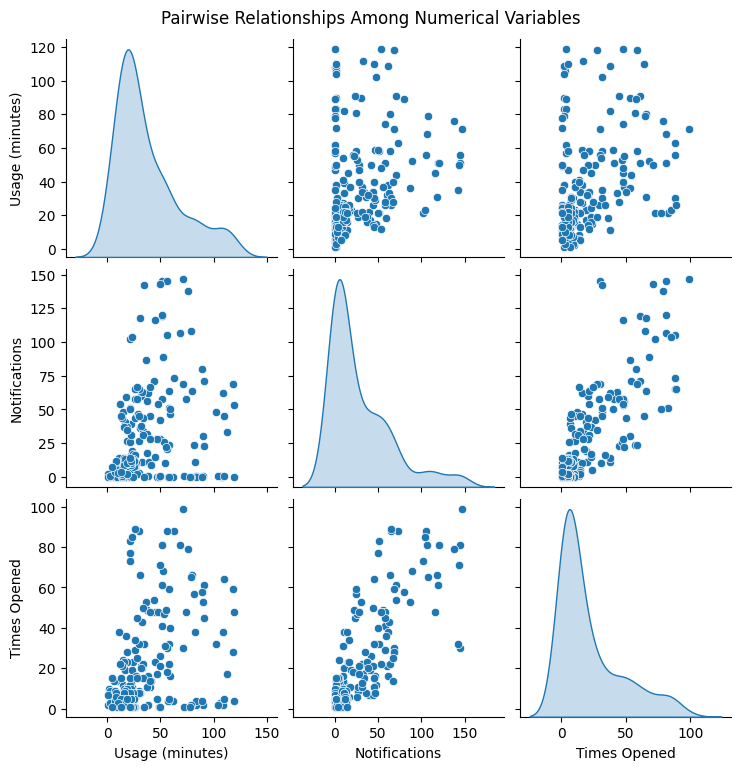

In [63]:
sns.pairplot(
    df[['Usage (minutes)', 'Notifications', 'Times Opened']],
    diag_kind='kde',
    palette='husl'
)
plt.suptitle('Pairwise Relationships Among Numerical Variables', y=1.02)
plt.show()

2. `Correlation Heatmap`: Examine how all numerical variables correlate with each other.

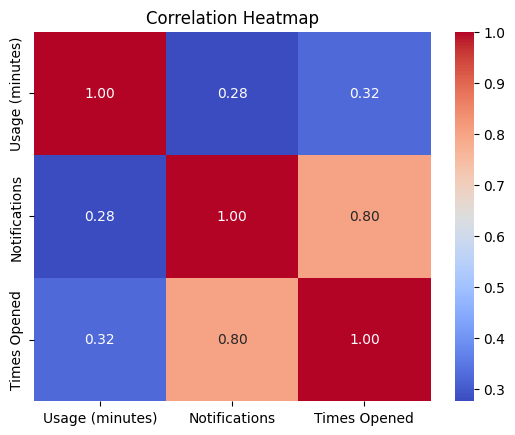

In [64]:
# Correlation Matrix
correlation_matrix = df[['Usage (minutes)', 'Notifications', 'Times Opened']].corr()

# Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

3. `App Usage Time by Day of the Week and App Name:` Analyze how app usage time varies across days of the week for top apps.

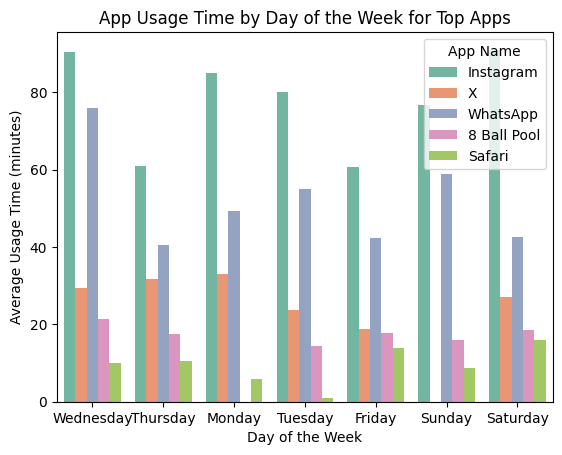

In [65]:
# Filter top apps
top_apps = df['App'].value_counts().head(5).index
filtered_df = df[df['App'].isin(top_apps)]

# Grouped Bar Plot
sns.barplot(
    data=filtered_df,
    x='Day',
    y='Usage (minutes)',
    hue='App',
    errorbar=None,
    palette='Set2'
)
plt.title('App Usage Time by Day of the Week for Top Apps')
plt.xlabel('Day of the Week')
plt.ylabel('Average Usage Time (minutes)')
plt.legend(title='App Name')
plt.show()

4. `Notifications vs. Total Openings by App Name`: Explore how notifications influence app openings for different apps.

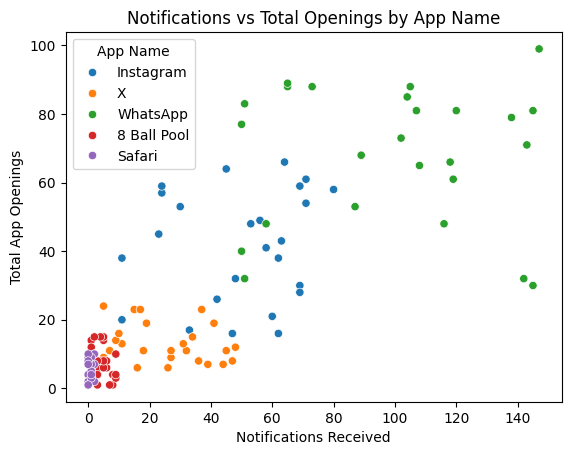

In [66]:
sns.scatterplot(
    data=filtered_df,
    x='Notifications',
    y='Times Opened',
    hue='App',
    palette='tab10'
)
plt.title('Notifications vs Total Openings by App Name')
plt.xlabel('Notifications Received')
plt.ylabel('Total App Openings')
plt.legend(title='App Name')
plt.show()

5. `Usage Time, Notifications, and App Openings (3D Plot):` Visualize relationships among three numerical variables.

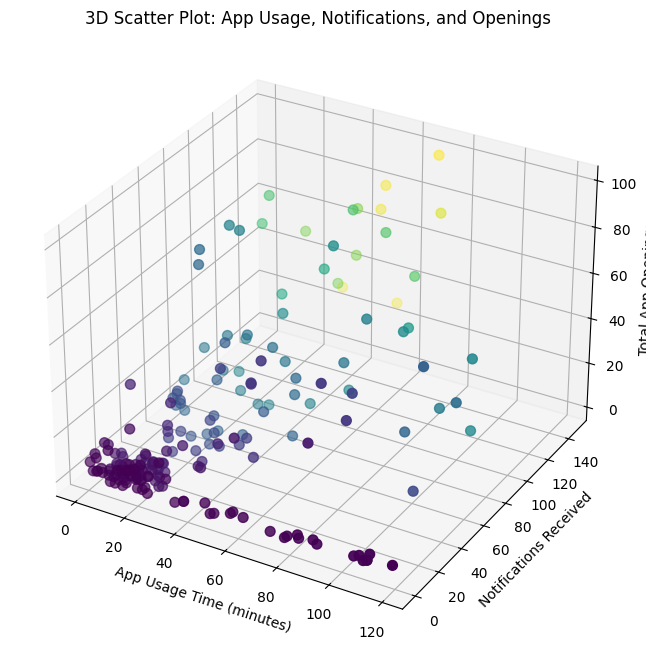

In [67]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter Plot
ax.scatter(
    df['Usage (minutes)'],
    df['Notifications'],
    df['Times Opened'],
    c=df['Notifications'], cmap='viridis', s=50
)

# Labels
ax.set_title('3D Scatter Plot: App Usage, Notifications, and Openings')
ax.set_xlabel('App Usage Time (minutes)')
ax.set_ylabel('Notifications Received')
ax.set_zlabel('Total App Openings')

plt.show()

6. `Interaction Effect: Notifications and Openings on Usage Time`: Investigate the combined effect of two variables (e.g., notifications and openings) on app usage time.

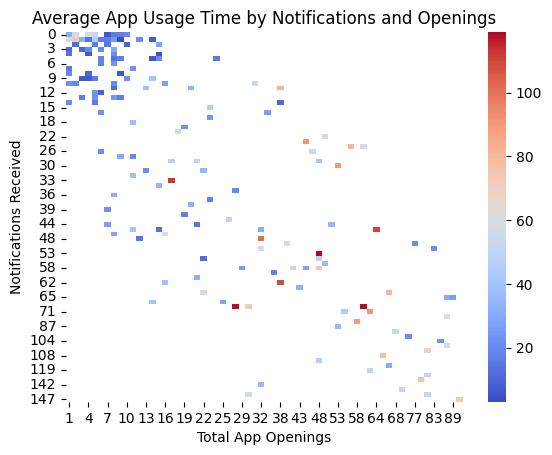

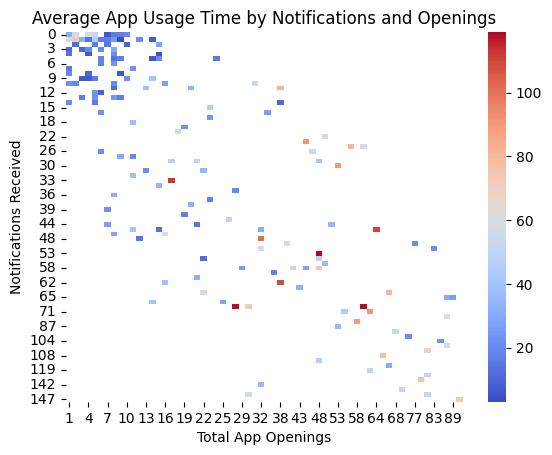

In [69]:
# Create a Pivot Table
pivot_table = df.pivot_table(
    values='Usage (minutes)',
    index='Notifications',
    columns='Times Opened',
    aggfunc='mean'
)

# Heatmap
sns.heatmap(pivot_table, cmap='coolwarm', annot=False)
plt.title('Average App Usage Time by Notifications and Openings')
plt.xlabel('Total App Openings')
plt.ylabel('Notifications Received')
plt.show()# Create a Pivot Table
pivot_table = df.pivot_table(
    values='Usage (minutes)',
    index='Notifications',
    columns='Times Opened',
    aggfunc='mean'
)

# Heatmap
sns.heatmap(pivot_table, cmap='coolwarm', annot=False)
plt.title('Average App Usage Time by Notifications and Openings')
plt.xlabel('Total App Openings')
plt.ylabel('Notifications Received')
plt.show()



7. `Multi-Category Analysis Using Grouped Statistics`: Compare app usage statistics (mean, median, std) across multiple categories (e.g., day of the week and app name).

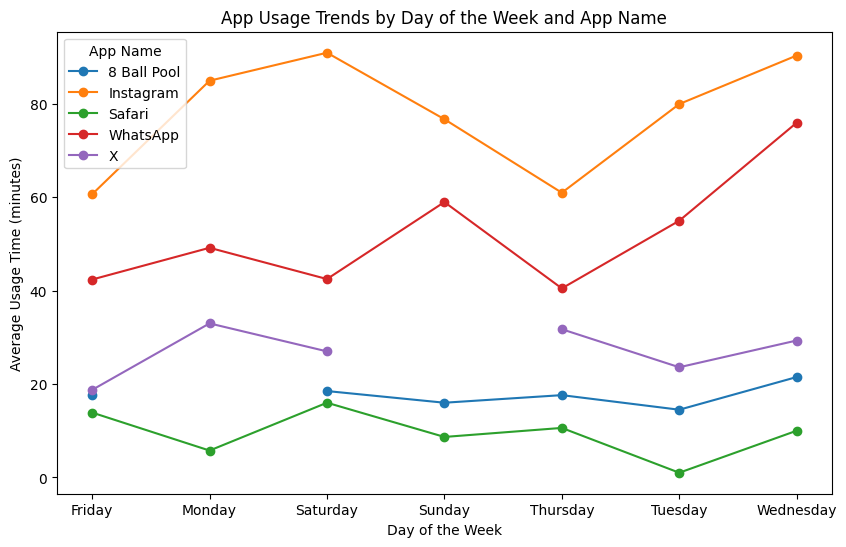

In [70]:
# Group Data
grouped = filtered_df.groupby(['Day', 'App'])['Usage (minutes)'].mean().unstack()

# Line Plot
grouped.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('App Usage Trends by Day of the Week and App Name')
plt.xlabel('Day of the Week')
plt.ylabel('Average Usage Time (minutes)')
plt.legend(title='App Name')
plt.show()

8. `Clustering Analysis (Optional)`: Group apps based on usage patterns (e.g., usage time, notifications, openings). Use K-Means clustering.   
This is an advanced data analytics step that requires a good understanding of clustering algorithms and their applications. It's not a compulsory step here, but it can provide valuable insights into user behavior.

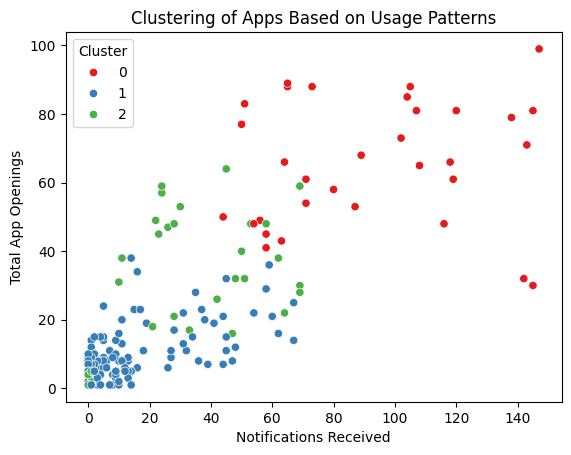

In [71]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select Features
features = df[['Usage (minutes)', 'Notifications', 'Times Opened']]

# Standardize Data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize Clusters
sns.scatterplot(
    data=df,
    x='Notifications',
    y='Times Opened',
    hue='Cluster',
    palette='Set1'
)
plt.title('Clustering of Apps Based on Usage Patterns')
plt.xlabel('Notifications Received')
plt.ylabel('Total App Openings')
plt.legend(title='Cluster')
plt.show()

9. `Advanced Visualization`: Parallel Coordinates: Compare multiple numerical variables for each app:

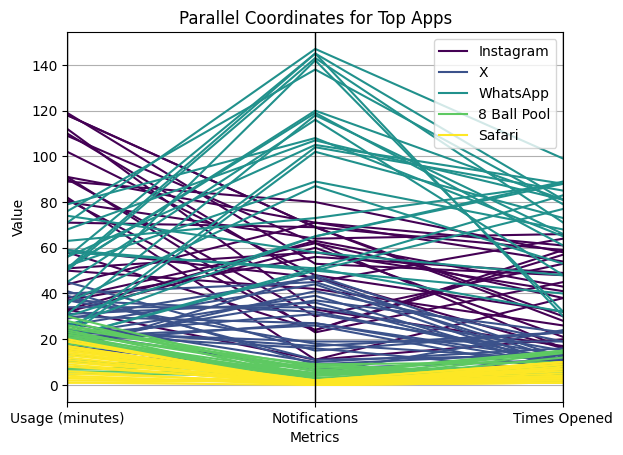

In [72]:
from pandas.plotting import parallel_coordinates

# Filter Top Apps
parallel_data = df[df['App'].isin(top_apps)]

# Parallel Coordinates Plot
parallel_coordinates(
    parallel_data[['App', 'Usage (minutes)', 'Notifications', 'Times Opened']],
    class_column='App',
    colormap='viridis'
)
plt.title('Parallel Coordinates for Top Apps')
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.show()

#### **Findings:**

1. `Complex Relationships`: Identify how two or more variables (e.g., notifications and openings) together influence usage time.

2. `Patterns by Day and App`: Explore combined effects of categorical variables like day of the week and app name.

3. `Clustering`: Group apps with similar usage patterns and uncover behavioral trends.

---------------------------

#### **Step-8: Time-Series-Analysis:**

Time series analysis involves examining how data changes over time. In your "Screen Time Analysis" dataset, you can analyze variables like **App Usage Time**, **Notifications Received**, and **Total App Openings** over time. B

1. **Ensure `Date` Column is in `DateTime` Format:**  
Convert the `Date` column into a `datetime` object if it is not already.

In [73]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set Date as index for time series analysis
df.set_index('Date', inplace=True)

In [75]:
df.columns

Index(['App', 'Usage (minutes)', 'Notifications', 'Times Opened', 'Day',
       'Is Weekend', 'Cluster'],
      dtype='object')

In [76]:
df.head()

,App,Usage (minutes),Notifications,Times Opened,Day,Is Weekend,Cluster
Date,,,,,,,
2024-08-07,Instagram,81,24,57,Wednesday,False,2
2024-08-08,Instagram,90,30,53,Thursday,False,2
2024-08-26,Instagram,112,33,17,Monday,False,2
2024-08-22,Instagram,82,11,38,Thursday,False,2
2024-08-12,Instagram,59,47,16,Monday,False,2


2. **`Aggregate Data by Time Period`**:  
Aggregate data by specific time periods, such as daily, weekly, or monthly.

In [81]:
# Aggregate daily data (sum of all usage per day)
daily_usage = df.resample('D').sum()
daily_usage.head()

,App,Usage (minutes),Notifications,Times Opened,Day,Is Weekend,Cluster
Date,,,,,,,
2024-08-01,XXXX8 Ball Pool8 Ball Pool8 Ball PoolSafariNet...,300,100,91,ThursdayThursdayThursdayThursdayThursdayThursd...,0,11
2024-08-02,SafariLinkedIn,30,4,10,FridayFriday,0,2
2024-08-03,XWhatsApp8 Ball Pool8 Ball Pool8 Ball Pool8 Ba...,338,180,178,SaturdaySaturdaySaturdaySaturdaySaturdaySaturd...,11,11
2024-08-04,Instagram8 Ball PoolSafariNetflixLinkedIn,165,81,41,SundaySundaySundaySundaySunday,5,6
2024-08-05,WhatsAppSafariSafariNetflixFacebookLinkedIn,244,187,124,MondayMondayMondayMondayMondayMonday,0,6


In [83]:
# Aggregate weekly data
weekly_usage = df.resample('W').sum()
weekly_usage.head()

,App,Usage (minutes),Notifications,Times Opened,Day,Is Weekend,Cluster
Date,,,,,,,
2024-08-04,XXXX8 Ball Pool8 Ball Pool8 Ball PoolSafariNet...,833,365,320,ThursdayThursdayThursdayThursdayThursdayThursd...,16,30
2024-08-11,WhatsAppSafariSafariNetflixFacebookLinkedInXWh...,1527,1002,843,MondayMondayMondayMondayMondayMondayTuesdayTue...,11,43
2024-08-18,InstagramXWhatsAppNetflixFacebookFacebookXXX8 ...,1698,1287,984,MondayMondayMondayMondayMondayMondayTuesdayTue...,14,44
2024-08-25,WhatsAppWhatsAppNetflixNetflixNetflixInstagram...,1898,1730,1161,MondayMondayMondayMondayMondayTuesdayTuesdayTu...,13,43
2024-09-01,InstagramInstagramInstagramXXXWhatsAppSafariSa...,1594,1363,1018,MondayMondayMondayMondayMondayMondayMondayMond...,0,48


In [82]:
# Aggregate monthly data
monthly_usage = df.resample('ME').sum()
monthly_usage.head()

,App,Usage (minutes),Notifications,Times Opened,Day,Is Weekend,Cluster
Date,,,,,,,
2024-08-31,XXXX8 Ball Pool8 Ball Pool8 Ball PoolSafariNet...,7550,5747,4326,ThursdayThursdayThursdayThursdayThursdayThursd...,54,208


3. **Plot Daily Trends**
Visualize daily trends of numerical variables like **App Usage Time** or **Notifications Received**.

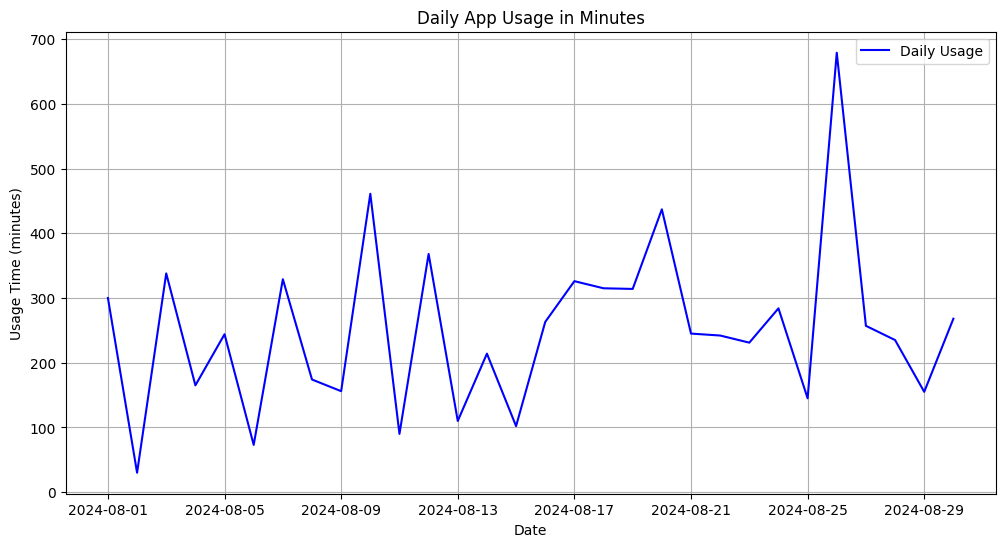

In [84]:
# Daily trends of App Usage Time
plt.figure(figsize=(12, 6))
plt.plot(daily_usage.index, daily_usage['Usage (minutes)'], label='Daily Usage', color='blue')
plt.title('Daily App Usage in Minutes')
plt.xlabel('Date')
plt.ylabel('Usage Time (minutes)')
plt.legend()
plt.grid(True)
plt.show()

4. **Compare Weekly or Monthly Trends:**
Use line plots to visualize aggregated trends over weeks or months.

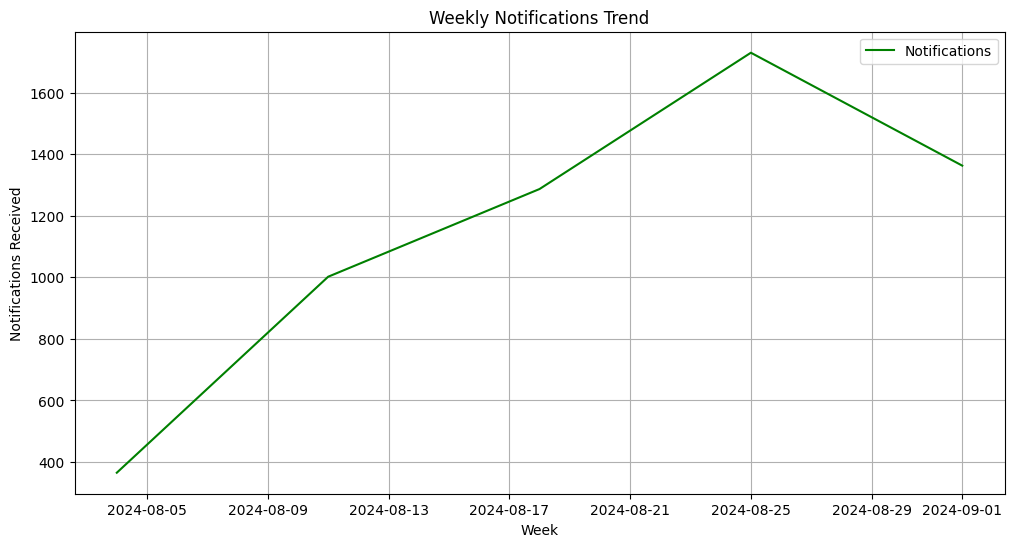

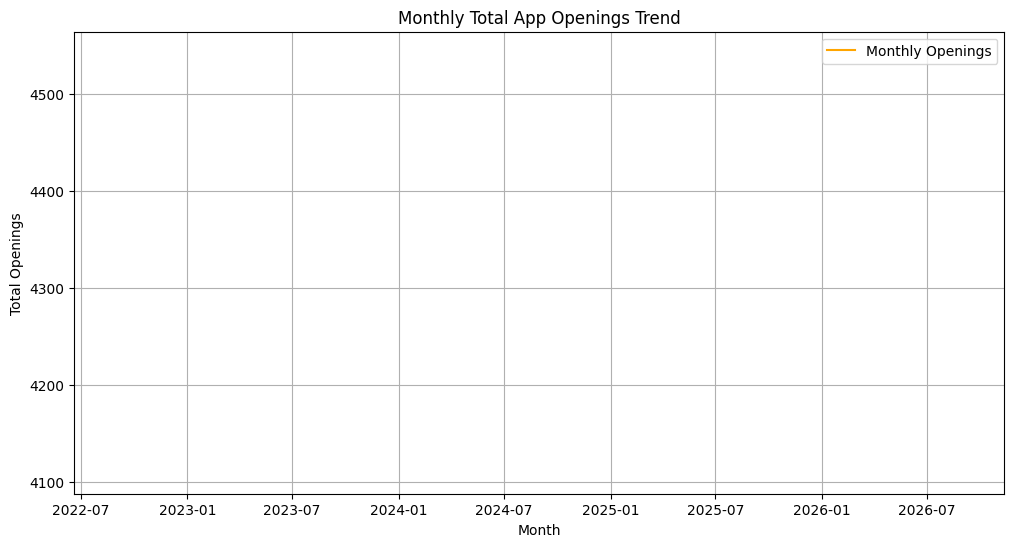

In [86]:
# Weekly trends of Notifications
plt.figure(figsize=(12, 6))
plt.plot(weekly_usage.index, weekly_usage['Notifications'], label='Notifications', color='green')
plt.title('Weekly Notifications Trend')
plt.xlabel('Week')
plt.ylabel('Notifications Received')
plt.legend()
plt.grid(True)
plt.show()

# Monthly trends of Total App Openings
plt.figure(figsize=(12, 6))
plt.plot(monthly_usage.index, monthly_usage['Times Opened'], label='Monthly Openings', color='orange')
plt.title('Monthly Total App Openings Trend')
plt.xlabel('Month')
plt.ylabel('Total Openings')
plt.legend()
plt.grid(True)
plt.show()

5. **`Analyze Seasonality (Decomposition)`:**
Break down the time series into components: **Trend**, **Seasonality**, and **Residuals**.

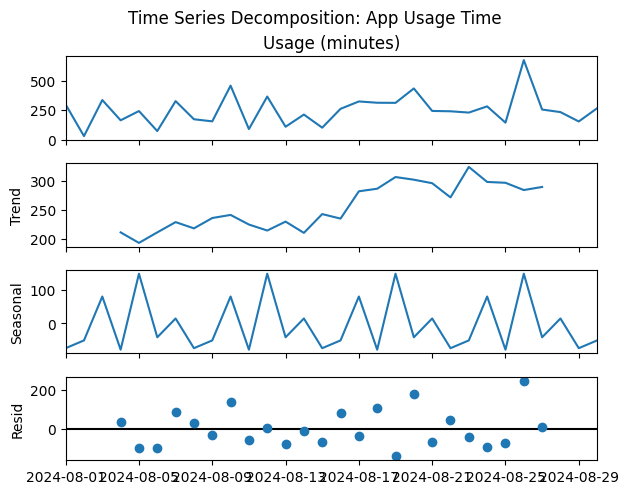

In [87]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose App Usage Time (daily data)
decomposition = seasonal_decompose(daily_usage['Usage (minutes)'], model='additive')

# Plot decomposition
decomposition.plot()
plt.suptitle('Time Series Decomposition: App Usage Time', y=1.02)
plt.show()

6. **`Rolling Statistics for Moving Averages`:**
Smoothen data by calculating rolling averages to identify long-term trends.

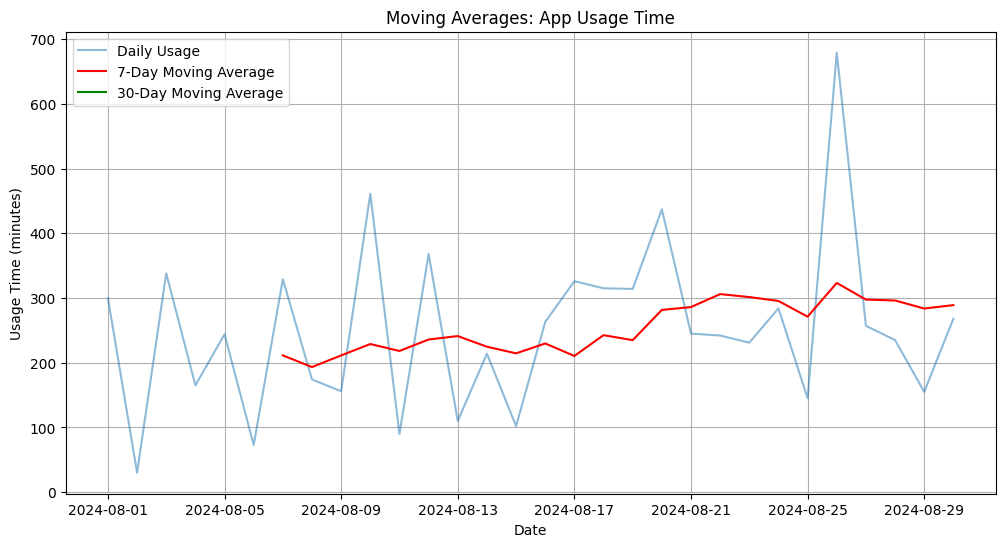

In [88]:
# Calculate 7-day and 30-day rolling averages
daily_usage['7-day MA'] = daily_usage['Usage (minutes)'].rolling(window=7).mean()
daily_usage['30-day MA'] = daily_usage['Usage (minutes)'].rolling(window=30).mean()

# Plot moving averages
plt.figure(figsize=(12, 6))
plt.plot(daily_usage.index, daily_usage['Usage (minutes)'], label='Daily Usage', alpha=0.5)
plt.plot(daily_usage.index, daily_usage['7-day MA'], label='7-Day Moving Average', color='red')
plt.plot(daily_usage.index, daily_usage['30-day MA'], label='30-Day Moving Average', color='green')
plt.title('Moving Averages: App Usage Time')
plt.xlabel('Date')
plt.ylabel('Usage Time (minutes)')
plt.legend()
plt.grid(True)
plt.show()

7. **`Analyze Specific Apps Over Time`:**
Analyze trends for individual apps or top apps.

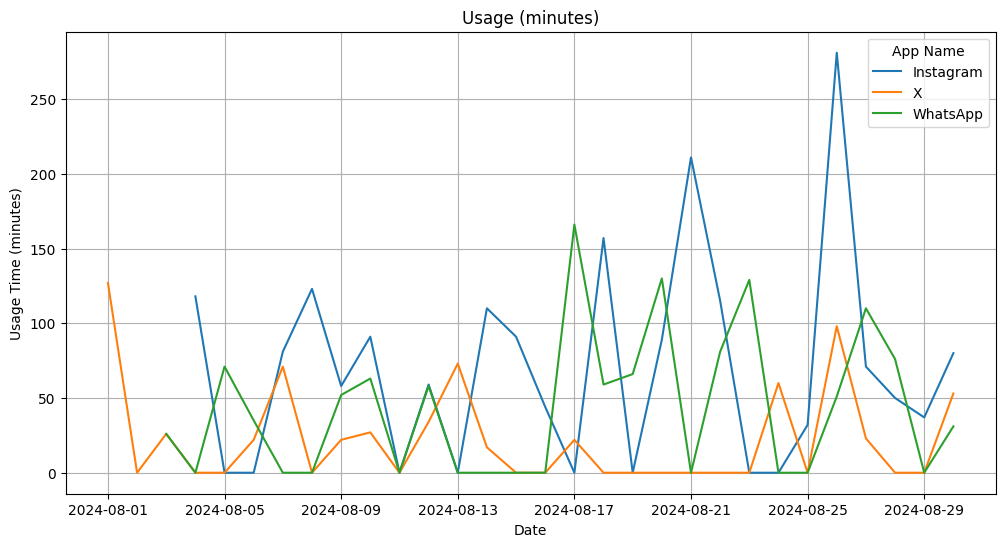

In [90]:
# Filter data for top apps
top_apps = df['App'].value_counts().head(3).index
filtered_df = df[df['App'].isin(top_apps)]

# Plot trends for each app
plt.figure(figsize=(12, 6))
for app in top_apps:
    app_data = filtered_df[filtered_df['App'] == app]
    app_daily_usage = app_data.resample('D').sum()
    plt.plot(app_daily_usage.index, app_daily_usage['Usage (minutes)'], label=app)

plt.title('Usage (minutes)')
plt.xlabel('Date')
plt.ylabel('Usage Time (minutes)')
plt.legend(title='App Name')
plt.grid(True)
plt.show()

8. **`Correlation Over Time`:**
Examine how variables correlate over time (e.g., app openings and notifications).

In [93]:
# Rolling Correlation (e.g., between Notifications and App Openings)
rolling_corr = daily_usage['Notifications'].rolling(window=30).corr(daily_usage['Times Opened'])
rolling_corr

Date
2024-08-01         NaN
2024-08-02         NaN
2024-08-03         NaN
2024-08-04         NaN
2024-08-05         NaN
2024-08-06         NaN
2024-08-07         NaN
2024-08-08         NaN
2024-08-09         NaN
2024-08-10         NaN
2024-08-11         NaN
2024-08-12         NaN
2024-08-13         NaN
2024-08-14         NaN
2024-08-15         NaN
2024-08-16         NaN
2024-08-17         NaN
2024-08-18         NaN
2024-08-19         NaN
2024-08-20         NaN
2024-08-21         NaN
2024-08-22         NaN
2024-08-23         NaN
2024-08-24         NaN
2024-08-25         NaN
2024-08-26         NaN
2024-08-27         NaN
2024-08-28         NaN
2024-08-29         NaN
2024-08-30    0.898556
Freq: D, dtype: float64

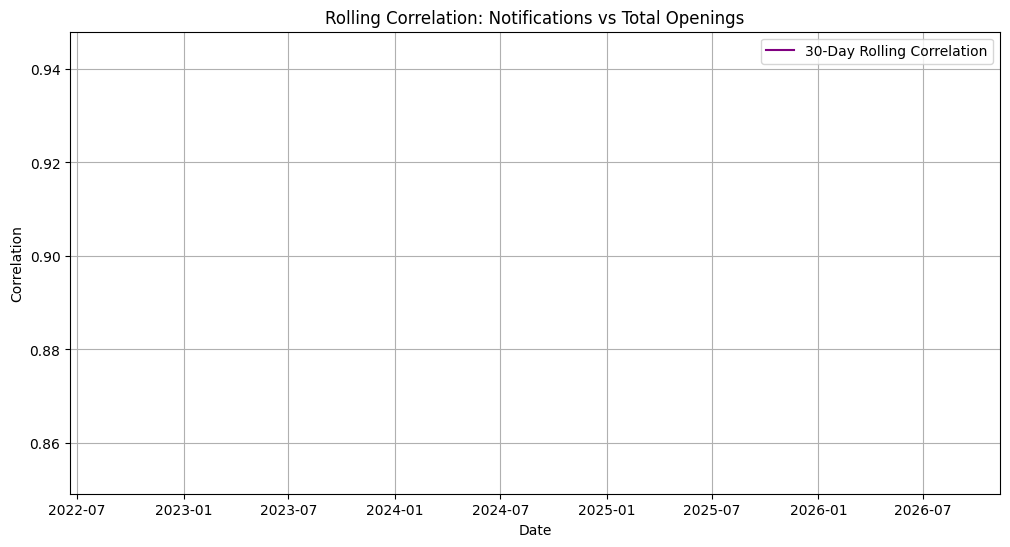

In [94]:
# Plot rolling correlation
plt.figure(figsize=(12, 6))
plt.plot(rolling_corr.index, rolling_corr, label='30-Day Rolling Correlation', color='purple')
plt.title('Rolling Correlation: Notifications vs Total Openings')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.legend()
plt.grid(True)
plt.show()

9. **`Forecasting Future Values`:**
You can use models like ARIMA or Prophet for forecasting.

In [ ]:
from prophet import Prophet

# Prepare data for Prophet
prophet_df = daily_usage['App Usage Time in minutes'].reset_index()
prophet_df.columns = ['ds', 'y']

# Initialize and fit the model
model = Prophet()
model.fit(prophet_df)

# Make future predictions
future = model.make_future_dataframe(periods=30)  # Predict next 30 days
forecast = model.predict(future)

# Plot forecast
model.plot(forecast)
plt.title('Forecasting App Usage Time (Next 30 Days)')
plt.show()

#### **Findings:**

1. **Long-Term Trends**:
   - Understand whether app usage is increasing or decreasing over time.

2. **Seasonality**:
   - Identify periodic patterns (e.g., weekends have higher usage).

3. **Forecasting**:
   - Predict future trends to make informed decisions.

4. **Individual Analysis**:
   - Drill down to specific apps for tailored insights.

------------

## **Advanced Data Profiling:**

#### **1. `Pandas Profiling` Or, `YData Profiling`:**

Use the `ydata-profiling` library for a detailed automated data report.

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title="Data Profiling Report")
profile.to_notebook_iframe()

#### **2. Sweetviz:**

Generate a comparative or single-dataset report using `Sweetviz`.

In [ ]:
import sweetviz as sv
report = sv.analyze(df)
report.show_html('report.html')